In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

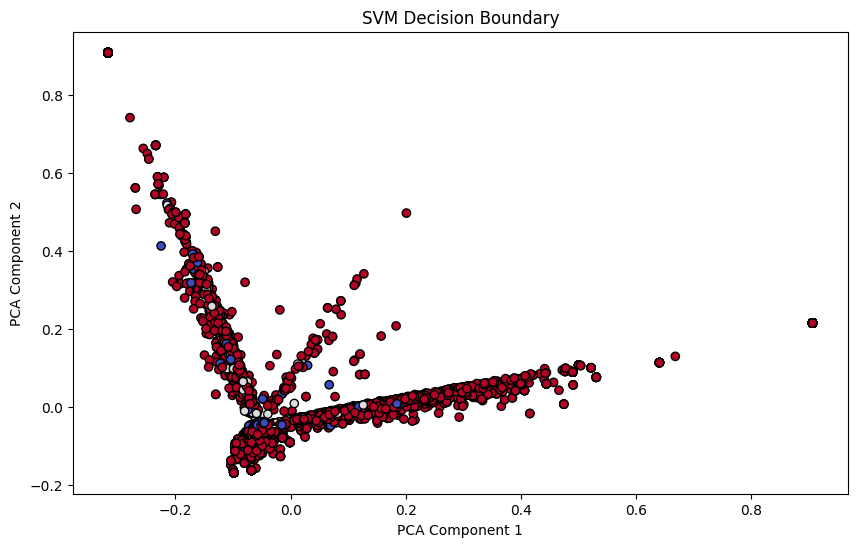

In [23]:
# Load and preprocess the data
reviews_data = pd.read_csv("D:/Associate - Junior DS Assessment/Junior (A - L2) Data Science/Data/final_ds_nlp/modified_final_file.csv")
reviews_data = reviews_data.dropna(subset=['translated_content','sentiment2'])

# Define features and target variable
X = reviews_data['translated_content']
y = reviews_data['sentiment2']  # Sentiment column should contain classes like 'positive', 'neutral', 'negative'

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(X)


# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Apply PCA to reduce the dimensionality to 2D for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train.toarray())
X_test_pca = pca.transform(X_test.toarray())

# Train the SVM model with a linear kernel
svm = SVC(kernel='linear', decision_function_shape='ovr')
svm.fit(X_train_pca, y_train)

# Mapping sentiment labels to numeric values
label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
y_train_mapped = y_train.map(label_mapping)

# Plot the data and decision boundary with numeric labels
plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_mapped, cmap='coolwarm', edgecolors='k')

# Create a grid to plot the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Generate a grid of points within the limits of the plot
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 500), np.linspace(ylim[0], ylim[1], 500))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Get the decision function values for the grid points
Z = svm.decision_function(grid_points)

# For multi-class, select the class with the maximum decision value for each grid point
Z = np.max(Z, axis=1)
Z = Z.reshape(xx.shape)

# Plot the decision boundary and margins
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.title('SVM Decision Boundary')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

